# Unsupervised Machine Learning: KNN

**K-Nearest Neighbour** algorithm is the simpliest ML algorithm. Also known as lazy learning (why? Because it does not create a generalized model during the time of training, so the testing phase is very important where it does the actual job. 

- **KNN classification**: the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors.
- **KNN regression**: the output is the property value for the object. This value is the average of the values of k nearest neighbors.

The distance measures for continious variables are:

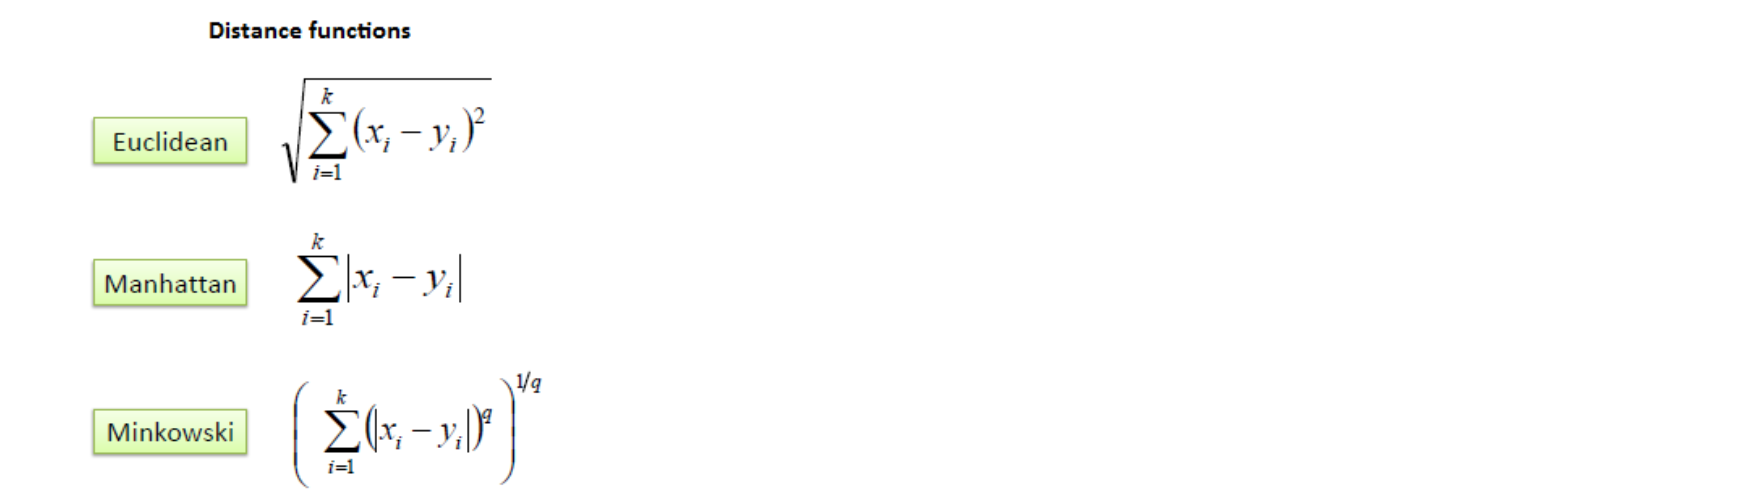

In the instance of categorical variables, the Hamming distance must be used.

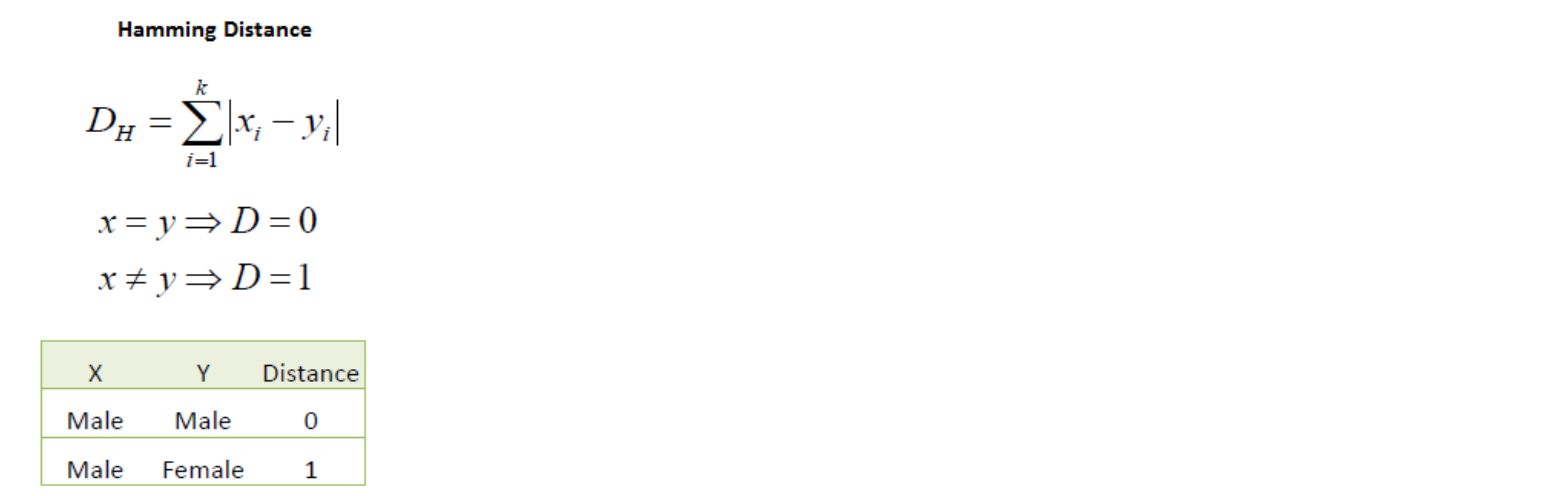

**How to choose the value of K**
K value is a hyperparameter which needs to choose during the time of model building. 
- Low K: low bias, high variance. 
- High K: smoother decision boundary --> low variance, high bias.

We should choose an odd number if the number of classes is even. **The most common values are to be 3 & 5**.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

## 1. KNN Classifier

Tutorial: https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55

In [3]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

In [6]:
X.head()

,mean area,mean compactness
0,1001.0,0.27760
1,1326.0,0.07864
2,1203.0,0.15990
3,386.1,0.28390
4,1297.0,0.13280


In [7]:
y.head()

,benign
0,0
1,0
2,0
3,0
4,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), random_state=1)

In [24]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [25]:
y_pred = knn.predict(X_test)

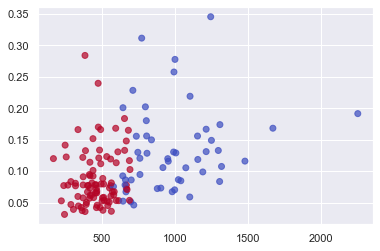

In [28]:
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

In [29]:
confusion_matrix(y_test, y_pred)

array([[42, 13],
       [ 9, 79]])

## 2. KNN Regression

Tutorial: https://medium.com/analytics-vidhya/k-neighbors-regression-analysis-in-python-61532d56d8e4

In [31]:
import mglearn 
from sklearn.neighbors import KNeighborsRegressor

In [32]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
reg = KNeighborsRegressor(n_neighbors=3, metric='minkowski')
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [41]:
print(reg.score(X_test, y_test))

0.8344172446249605
